Dictionary Learning
===================

This example demonstrates the use of class [wbpdndl.WeightedBPDNDictLearn](http://sporco.rtfd.org/en/latest/modules/sporco.dictlrn.wbpdndl.html#sporco.dictlrn.wbpdndl.WeightedBPDNDictLearn) for learning a dictionary (standard, not convolutional) from a set of training images. The primary purpose of this example is to demonstrate the use of a dictionary learning class based on PGM solvers for the sparse coding and dictionary update stages; the support for a weighted data fidelity term that is included in [wbpdndl.WeightedBPDNDictLearn](http://sporco.rtfd.org/en/latest/modules/sporco.dictlrn.wbpdndl.html#sporco.dictlrn.wbpdndl.WeightedBPDNDictLearn) is not used.

In [1]:
from __future__ import division, print_function
from builtins import input

import numpy as np

from sporco.dictlrn import wbpdndl
from sporco import util
from sporco import array
from sporco import plot
plot.config_notebook_plotting()

Load training images.

In [2]:
exim = util.ExampleImages(scaled=True, zoom=0.25, gray=True)
S1 = exim.image('barbara.png', idxexp=np.s_[10:522, 100:612])
S2 = exim.image('kodim23.png', idxexp=np.s_[:, 60:572])
S3 = exim.image('monarch.png', idxexp=np.s_[:, 160:672])
S4 = exim.image('sail.png', idxexp=np.s_[:, 210:722])
S5 = exim.image('tulips.png', idxexp=np.s_[:, 30:542])

Extract all 8x8 image blocks, reshape, and subtract block means.

In [3]:
S = array.extract_blocks((S1, S2, S3, S4, S5), (8, 8))
S = np.reshape(S, (np.prod(S.shape[0:2]), S.shape[2]))
S -= np.mean(S, axis=0)

Construct initial dictionary.

In [4]:
np.random.seed(12345)
D0 = np.random.randn(S.shape[0], 128)

Set regularization parameter and options for dictionary learning solver.

In [5]:
lmbda = 0.1
opt = wbpdndl.WeightedBPDNDictLearn.Options(
    {'Verbose': True, 'MaxMainIter': 150,
     'BPDN': {'L': 1e1}, 'CMOD': {'L': 1e3}})

Create solver object and solve.

In [6]:
d = wbpdndl.WeightedBPDNDictLearn(D0, S, lmbda, opt=opt)
d.solve()
print("WeightedBPDNDictLearn solve time: %.2fs" % d.timer.elapsed('solve'))

Itn   Fnc       DFid      ℓ1        Cnstr     X_Rsdl    X_L       D_Rsdl    D_L     
------------------------------------------------------------------------------------


   0  3.58e+04  3.27e+04  3.17e+04  1.05e-06  2.49e+01  1.00e+01  1.27e+00  1.00e+03


   1  2.97e+04  2.34e+04  6.29e+04  1.08e-06  2.39e+01  1.00e+01  1.63e+00  1.00e+03


   2  2.48e+04  1.61e+04  8.66e+04  1.16e-06  1.35e+01  1.00e+01  9.11e-01  1.00e+03


   3  2.23e+04  1.26e+04  9.78e+04  1.06e-06  9.39e+00  1.00e+01  6.09e-01  1.00e+03


   4  2.09e+04  1.04e+04  1.05e+05  1.10e-06  6.20e+00  1.00e+01  3.83e-01  1.00e+03


   5  2.00e+04  9.19e+03  1.09e+05  1.07e-06  4.95e+00  1.00e+01  2.63e-01  1.00e+03


   6  1.95e+04  8.46e+03  1.10e+05  1.05e-06  4.13e+00  1.00e+01  1.86e-01  1.00e+03


   7  1.91e+04  8.00e+03  1.11e+05  1.12e-06  3.56e+00  1.00e+01  1.37e-01  1.00e+03


   8  1.89e+04  7.70e+03  1.12e+05  1.06e-06  3.12e+00  1.00e+01  1.06e-01  1.00e+03


   9  1.87e+04  7.49e+03  1.12e+05  1.09e-06  2.78e+00  1.00e+01  8.52e-02  1.00e+03


  10  1.85e+04  7.34e+03  1.12e+05  1.11e-06  2.50e+00  1.00e+01  6.98e-02  1.00e+03


  11  1.84e+04  7.22e+03  1.12e+05  1.11e-06  2.26e+00  1.00e+01  5.83e-02  1.00e+03


  12  1.83e+04  7.13e+03  1.12e+05  1.12e-06  2.07e+00  1.00e+01  4.92e-02  1.00e+03


  13  1.82e+04  7.06e+03  1.11e+05  1.05e-06  1.91e+00  1.00e+01  4.22e-02  1.00e+03


  14  1.81e+04  7.01e+03  1.11e+05  1.20e-06  1.77e+00  1.00e+01  3.68e-02  1.00e+03


  15  1.81e+04  6.96e+03  1.11e+05  1.12e-06  1.65e+00  1.00e+01  3.26e-02  1.00e+03


  16  1.80e+04  6.93e+03  1.11e+05  1.07e-06  1.56e+00  1.00e+01  2.93e-02  1.00e+03


  17  1.80e+04  6.90e+03  1.11e+05  1.04e-06  1.47e+00  1.00e+01  2.67e-02  1.00e+03


  18  1.79e+04  6.88e+03  1.10e+05  1.01e-06  1.40e+00  1.00e+01  2.47e-02  1.00e+03


  19  1.79e+04  6.86e+03  1.10e+05  1.01e-06  1.33e+00  1.00e+01  2.34e-02  1.00e+03


  20  1.78e+04  6.84e+03  1.10e+05  1.06e-06  1.27e+00  1.00e+01  2.25e-02  1.00e+03


  21  1.78e+04  6.83e+03  1.09e+05  9.06e-07  1.22e+00  1.00e+01  2.19e-02  1.00e+03


  22  1.77e+04  6.82e+03  1.09e+05  1.14e-06  1.18e+00  1.00e+01  2.15e-02  1.00e+03


  23  1.77e+04  6.80e+03  1.09e+05  1.00e-06  1.14e+00  1.00e+01  2.11e-02  1.00e+03


  24  1.77e+04  6.79e+03  1.09e+05  1.06e-06  1.11e+00  1.00e+01  2.06e-02  1.00e+03


  25  1.76e+04  6.77e+03  1.09e+05  1.04e-06  1.08e+00  1.00e+01  2.02e-02  1.00e+03


  26  1.76e+04  6.76e+03  1.08e+05  1.23e-06  1.06e+00  1.00e+01  1.96e-02  1.00e+03


  27  1.76e+04  6.74e+03  1.08e+05  1.05e-06  1.04e+00  1.00e+01  1.92e-02  1.00e+03


  28  1.75e+04  6.73e+03  1.08e+05  1.17e-06  1.02e+00  1.00e+01  1.88e-02  1.00e+03


  29  1.75e+04  6.71e+03  1.08e+05  1.05e-06  1.01e+00  1.00e+01  1.84e-02  1.00e+03


  30  1.75e+04  6.69e+03  1.08e+05  9.84e-07  9.99e-01  1.00e+01  1.81e-02  1.00e+03


  31  1.74e+04  6.68e+03  1.07e+05  9.69e-07  9.91e-01  1.00e+01  1.79e-02  1.00e+03


  32  1.74e+04  6.66e+03  1.07e+05  1.02e-06  9.85e-01  1.00e+01  1.76e-02  1.00e+03


  33  1.74e+04  6.64e+03  1.07e+05  1.15e-06  9.82e-01  1.00e+01  1.73e-02  1.00e+03


  34  1.73e+04  6.62e+03  1.07e+05  1.00e-06  9.76e-01  1.00e+01  1.71e-02  1.00e+03


  35  1.73e+04  6.60e+03  1.07e+05  1.12e-06  9.68e-01  1.00e+01  1.69e-02  1.00e+03


  36  1.73e+04  6.58e+03  1.07e+05  1.08e-06  9.66e-01  1.00e+01  1.66e-02  1.00e+03


  37  1.72e+04  6.56e+03  1.07e+05  1.08e-06  9.66e-01  1.00e+01  1.64e-02  1.00e+03


  38  1.72e+04  6.54e+03  1.07e+05  9.57e-07  9.70e-01  1.00e+01  1.61e-02  1.00e+03


  39  1.72e+04  6.51e+03  1.06e+05  1.13e-06  9.69e-01  1.00e+01  1.59e-02  1.00e+03


  40  1.71e+04  6.49e+03  1.06e+05  1.08e-06  9.64e-01  1.00e+01  1.57e-02  1.00e+03


  41  1.71e+04  6.47e+03  1.06e+05  1.12e-06  9.71e-01  1.00e+01  1.55e-02  1.00e+03


  42  1.71e+04  6.45e+03  1.06e+05  1.01e-06  9.64e-01  1.00e+01  1.53e-02  1.00e+03


  43  1.70e+04  6.42e+03  1.06e+05  1.06e-06  9.79e-01  1.00e+01  1.50e-02  1.00e+03


  44  1.70e+04  6.40e+03  1.06e+05  1.10e-06  9.70e-01  1.00e+01  1.48e-02  1.00e+03


  45  1.70e+04  6.38e+03  1.06e+05  1.09e-06  9.75e-01  1.00e+01  1.45e-02  1.00e+03


  46  1.70e+04  6.35e+03  1.06e+05  1.03e-06  9.73e-01  1.00e+01  1.42e-02  1.00e+03


  47  1.69e+04  6.33e+03  1.06e+05  1.11e-06  9.70e-01  1.00e+01  1.41e-02  1.00e+03


  48  1.69e+04  6.30e+03  1.06e+05  9.67e-07  9.74e-01  1.00e+01  1.39e-02  1.00e+03


  49  1.69e+04  6.28e+03  1.06e+05  1.18e-06  9.67e-01  1.00e+01  1.38e-02  1.00e+03


  50  1.68e+04  6.26e+03  1.06e+05  1.01e-06  9.71e-01  1.00e+01  1.36e-02  1.00e+03


  51  1.68e+04  6.23e+03  1.06e+05  1.10e-06  9.67e-01  1.00e+01  1.35e-02  1.00e+03


  52  1.68e+04  6.21e+03  1.06e+05  1.00e-06  9.63e-01  1.00e+01  1.33e-02  1.00e+03


  53  1.68e+04  6.19e+03  1.06e+05  1.17e-06  9.63e-01  1.00e+01  1.32e-02  1.00e+03


  54  1.67e+04  6.16e+03  1.06e+05  1.11e-06  9.57e-01  1.00e+01  1.31e-02  1.00e+03


  55  1.67e+04  6.14e+03  1.06e+05  1.13e-06  9.56e-01  1.00e+01  1.29e-02  1.00e+03


  56  1.67e+04  6.12e+03  1.06e+05  9.79e-07  9.51e-01  1.00e+01  1.27e-02  1.00e+03


  57  1.67e+04  6.09e+03  1.06e+05  1.14e-06  9.49e-01  1.00e+01  1.26e-02  1.00e+03


  58  1.66e+04  6.07e+03  1.06e+05  1.06e-06  9.43e-01  1.00e+01  1.24e-02  1.00e+03


  59  1.66e+04  6.05e+03  1.06e+05  1.17e-06  9.38e-01  1.00e+01  1.23e-02  1.00e+03


  60  1.66e+04  6.02e+03  1.06e+05  1.15e-06  9.38e-01  1.00e+01  1.21e-02  1.00e+03


  61  1.66e+04  6.00e+03  1.06e+05  9.97e-07  9.32e-01  1.00e+01  1.20e-02  1.00e+03


  62  1.65e+04  5.98e+03  1.06e+05  1.17e-06  9.27e-01  1.00e+01  1.18e-02  1.00e+03


  63  1.65e+04  5.96e+03  1.06e+05  1.14e-06  9.24e-01  1.00e+01  1.17e-02  1.00e+03


  64  1.65e+04  5.93e+03  1.06e+05  1.08e-06  9.16e-01  1.00e+01  1.15e-02  1.00e+03


  65  1.65e+04  5.91e+03  1.06e+05  1.08e-06  9.09e-01  1.00e+01  1.14e-02  1.00e+03


  66  1.65e+04  5.89e+03  1.06e+05  1.11e-06  9.05e-01  1.00e+01  1.13e-02  1.00e+03


  67  1.64e+04  5.87e+03  1.06e+05  1.09e-06  8.93e-01  1.00e+01  1.12e-02  1.00e+03


  68  1.64e+04  5.85e+03  1.06e+05  1.09e-06  8.89e-01  1.00e+01  1.11e-02  1.00e+03


  69  1.64e+04  5.83e+03  1.06e+05  1.03e-06  8.85e-01  1.00e+01  1.10e-02  1.00e+03


  70  1.64e+04  5.81e+03  1.06e+05  1.16e-06  8.78e-01  1.00e+01  1.09e-02  1.00e+03


  71  1.64e+04  5.79e+03  1.06e+05  1.09e-06  8.76e-01  1.00e+01  1.09e-02  1.00e+03


  72  1.64e+04  5.77e+03  1.06e+05  1.14e-06  8.65e-01  1.00e+01  1.08e-02  1.00e+03


  73  1.63e+04  5.76e+03  1.06e+05  1.04e-06  8.61e-01  1.00e+01  1.08e-02  1.00e+03


  74  1.63e+04  5.74e+03  1.06e+05  1.01e-06  8.47e-01  1.00e+01  1.07e-02  1.00e+03


  75  1.63e+04  5.72e+03  1.06e+05  1.24e-06  8.45e-01  1.00e+01  1.07e-02  1.00e+03


  76  1.63e+04  5.70e+03  1.06e+05  1.03e-06  8.44e-01  1.00e+01  1.06e-02  1.00e+03


  77  1.63e+04  5.69e+03  1.06e+05  1.13e-06  8.30e-01  1.00e+01  1.05e-02  1.00e+03


  78  1.63e+04  5.67e+03  1.06e+05  1.07e-06  8.28e-01  1.00e+01  1.04e-02  1.00e+03


  79  1.62e+04  5.65e+03  1.06e+05  1.15e-06  8.22e-01  1.00e+01  1.03e-02  1.00e+03


  80  1.62e+04  5.64e+03  1.06e+05  1.03e-06  8.16e-01  1.00e+01  1.03e-02  1.00e+03


  81  1.62e+04  5.62e+03  1.06e+05  1.15e-06  8.10e-01  1.00e+01  1.02e-02  1.00e+03


  82  1.62e+04  5.61e+03  1.06e+05  1.12e-06  8.00e-01  1.00e+01  1.01e-02  1.00e+03


  83  1.62e+04  5.60e+03  1.06e+05  1.03e-06  7.86e-01  1.00e+01  1.00e-02  1.00e+03


  84  1.62e+04  5.58e+03  1.06e+05  1.10e-06  7.87e-01  1.00e+01  9.87e-03  1.00e+03


  85  1.62e+04  5.57e+03  1.06e+05  1.13e-06  7.79e-01  1.00e+01  9.72e-03  1.00e+03


  86  1.61e+04  5.56e+03  1.06e+05  9.68e-07  7.74e-01  1.00e+01  9.55e-03  1.00e+03


  87  1.61e+04  5.54e+03  1.06e+05  1.25e-06  7.62e-01  1.00e+01  9.39e-03  1.00e+03


  88  1.61e+04  5.53e+03  1.06e+05  1.14e-06  7.54e-01  1.00e+01  9.22e-03  1.00e+03


  89  1.61e+04  5.52e+03  1.06e+05  1.11e-06  7.46e-01  1.00e+01  9.06e-03  1.00e+03


  90  1.61e+04  5.51e+03  1.06e+05  1.24e-06  7.40e-01  1.00e+01  8.91e-03  1.00e+03


  91  1.61e+04  5.50e+03  1.06e+05  1.11e-06  7.30e-01  1.00e+01  8.76e-03  1.00e+03


  92  1.61e+04  5.49e+03  1.06e+05  1.22e-06  7.22e-01  1.00e+01  8.61e-03  1.00e+03


  93  1.61e+04  5.48e+03  1.06e+05  1.19e-06  7.12e-01  1.00e+01  8.45e-03  1.00e+03


  94  1.60e+04  5.47e+03  1.06e+05  1.06e-06  7.08e-01  1.00e+01  8.30e-03  1.00e+03


  95  1.60e+04  5.46e+03  1.06e+05  1.04e-06  7.03e-01  1.00e+01  8.14e-03  1.00e+03


  96  1.60e+04  5.45e+03  1.06e+05  1.06e-06  6.89e-01  1.00e+01  8.00e-03  1.00e+03


  97  1.60e+04  5.44e+03  1.06e+05  1.14e-06  6.87e-01  1.00e+01  7.84e-03  1.00e+03


  98  1.60e+04  5.43e+03  1.06e+05  1.08e-06  6.79e-01  1.00e+01  7.67e-03  1.00e+03


  99  1.60e+04  5.42e+03  1.06e+05  1.04e-06  6.70e-01  1.00e+01  7.49e-03  1.00e+03


 100  1.60e+04  5.41e+03  1.06e+05  9.78e-07  6.57e-01  1.00e+01  7.30e-03  1.00e+03


 101  1.60e+04  5.41e+03  1.06e+05  1.15e-06  6.50e-01  1.00e+01  7.11e-03  1.00e+03


 102  1.60e+04  5.40e+03  1.06e+05  1.22e-06  6.48e-01  1.00e+01  6.91e-03  1.00e+03


 103  1.60e+04  5.39e+03  1.06e+05  1.17e-06  6.35e-01  1.00e+01  6.71e-03  1.00e+03


 104  1.60e+04  5.39e+03  1.06e+05  1.12e-06  6.24e-01  1.00e+01  6.53e-03  1.00e+03


 105  1.60e+04  5.38e+03  1.06e+05  1.12e-06  6.18e-01  1.00e+01  6.35e-03  1.00e+03


 106  1.59e+04  5.38e+03  1.06e+05  1.03e-06  6.08e-01  1.00e+01  6.20e-03  1.00e+03


 107  1.59e+04  5.37e+03  1.06e+05  1.13e-06  5.95e-01  1.00e+01  6.05e-03  1.00e+03


 108  1.59e+04  5.37e+03  1.06e+05  1.07e-06  5.89e-01  1.00e+01  5.92e-03  1.00e+03


 109  1.59e+04  5.36e+03  1.06e+05  1.17e-06  5.74e-01  1.00e+01  5.79e-03  1.00e+03


 110  1.59e+04  5.36e+03  1.06e+05  1.07e-06  5.71e-01  1.00e+01  5.64e-03  1.00e+03


 111  1.59e+04  5.35e+03  1.06e+05  9.60e-07  5.57e-01  1.00e+01  5.48e-03  1.00e+03


 112  1.59e+04  5.35e+03  1.06e+05  1.06e-06  5.56e-01  1.00e+01  5.31e-03  1.00e+03


 113  1.59e+04  5.34e+03  1.06e+05  1.13e-06  5.43e-01  1.00e+01  5.16e-03  1.00e+03


 114  1.59e+04  5.34e+03  1.06e+05  1.18e-06  5.35e-01  1.00e+01  5.02e-03  1.00e+03


 115  1.59e+04  5.34e+03  1.06e+05  1.16e-06  5.22e-01  1.00e+01  4.91e-03  1.00e+03


 116  1.59e+04  5.33e+03  1.06e+05  1.13e-06  5.16e-01  1.00e+01  4.80e-03  1.00e+03


 117  1.59e+04  5.33e+03  1.06e+05  9.80e-07  5.10e-01  1.00e+01  4.70e-03  1.00e+03


 118  1.59e+04  5.33e+03  1.06e+05  1.18e-06  5.04e-01  1.00e+01  4.61e-03  1.00e+03


 119  1.59e+04  5.32e+03  1.06e+05  1.19e-06  4.97e-01  1.00e+01  4.52e-03  1.00e+03


 120  1.59e+04  5.32e+03  1.05e+05  1.17e-06  4.88e-01  1.00e+01  4.44e-03  1.00e+03


 121  1.59e+04  5.32e+03  1.05e+05  1.25e-06  4.82e-01  1.00e+01  4.35e-03  1.00e+03


 122  1.59e+04  5.32e+03  1.05e+05  1.13e-06  4.69e-01  1.00e+01  4.24e-03  1.00e+03


 123  1.59e+04  5.31e+03  1.05e+05  1.20e-06  4.64e-01  1.00e+01  4.15e-03  1.00e+03


 124  1.59e+04  5.31e+03  1.05e+05  1.08e-06  4.62e-01  1.00e+01  4.06e-03  1.00e+03


 125  1.59e+04  5.31e+03  1.05e+05  1.14e-06  4.57e-01  1.00e+01  3.98e-03  1.00e+03


 126  1.58e+04  5.31e+03  1.05e+05  1.15e-06  4.50e-01  1.00e+01  3.91e-03  1.00e+03


 127  1.58e+04  5.30e+03  1.05e+05  1.17e-06  4.40e-01  1.00e+01  3.82e-03  1.00e+03


 128  1.58e+04  5.30e+03  1.05e+05  1.12e-06  4.34e-01  1.00e+01  3.74e-03  1.00e+03


 129  1.58e+04  5.30e+03  1.05e+05  1.10e-06  4.27e-01  1.00e+01  3.67e-03  1.00e+03


 130  1.58e+04  5.30e+03  1.05e+05  1.11e-06  4.20e-01  1.00e+01  3.62e-03  1.00e+03


 131  1.58e+04  5.29e+03  1.05e+05  1.09e-06  4.12e-01  1.00e+01  3.57e-03  1.00e+03


 132  1.58e+04  5.29e+03  1.05e+05  1.25e-06  4.08e-01  1.00e+01  3.52e-03  1.00e+03


 133  1.58e+04  5.29e+03  1.05e+05  1.22e-06  4.06e-01  1.00e+01  3.47e-03  1.00e+03


 134  1.58e+04  5.29e+03  1.05e+05  1.12e-06  4.00e-01  1.00e+01  3.43e-03  1.00e+03


 135  1.58e+04  5.28e+03  1.05e+05  1.15e-06  3.90e-01  1.00e+01  3.39e-03  1.00e+03


 136  1.58e+04  5.28e+03  1.05e+05  1.16e-06  3.88e-01  1.00e+01  3.34e-03  1.00e+03


 137  1.58e+04  5.28e+03  1.05e+05  1.13e-06  3.88e-01  1.00e+01  3.28e-03  1.00e+03


 138  1.58e+04  5.28e+03  1.05e+05  1.16e-06  3.76e-01  1.00e+01  3.21e-03  1.00e+03


 139  1.58e+04  5.28e+03  1.05e+05  1.33e-06  3.68e-01  1.00e+01  3.16e-03  1.00e+03


 140  1.58e+04  5.27e+03  1.05e+05  1.06e-06  3.67e-01  1.00e+01  3.12e-03  1.00e+03


 141  1.58e+04  5.27e+03  1.05e+05  1.23e-06  3.62e-01  1.00e+01  3.09e-03  1.00e+03


 142  1.58e+04  5.27e+03  1.05e+05  1.10e-06  3.63e-01  1.00e+01  3.05e-03  1.00e+03


 143  1.58e+04  5.27e+03  1.05e+05  1.10e-06  3.60e-01  1.00e+01  3.01e-03  1.00e+03


 144  1.58e+04  5.27e+03  1.05e+05  1.13e-06  3.52e-01  1.00e+01  2.95e-03  1.00e+03


 145  1.58e+04  5.26e+03  1.05e+05  1.19e-06  3.51e-01  1.00e+01  2.89e-03  1.00e+03


 146  1.58e+04  5.26e+03  1.05e+05  1.23e-06  3.42e-01  1.00e+01  2.84e-03  1.00e+03


 147  1.58e+04  5.26e+03  1.05e+05  1.08e-06  3.36e-01  1.00e+01  2.78e-03  1.00e+03


 148  1.58e+04  5.26e+03  1.05e+05  1.22e-06  3.35e-01  1.00e+01  2.73e-03  1.00e+03


 149  1.58e+04  5.26e+03  1.05e+05  9.70e-07  3.28e-01  1.00e+01  2.68e-03  1.00e+03
------------------------------------------------------------------------------------
WeightedBPDNDictLearn solve time: 56.84s


Display initial and final dictionaries.

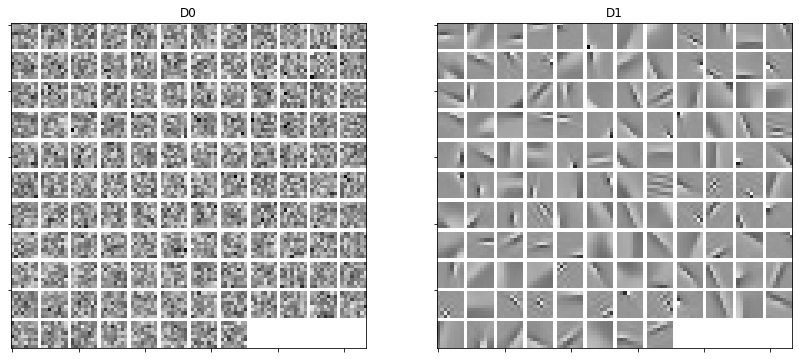

In [7]:
D1 = d.getdict().reshape((8, 8, D0.shape[1]))
D0 = D0.reshape(8, 8, D0.shape[-1])
fig = plot.figure(figsize=(14, 7))
plot.subplot(1, 2, 1)
plot.imview(util.tiledict(D0), title='D0', fig=fig)
plot.subplot(1, 2, 2)
plot.imview(util.tiledict(D1), title='D1', fig=fig)
fig.show()

Get iterations statistics from solver object and plot functional value and PGM residuals.

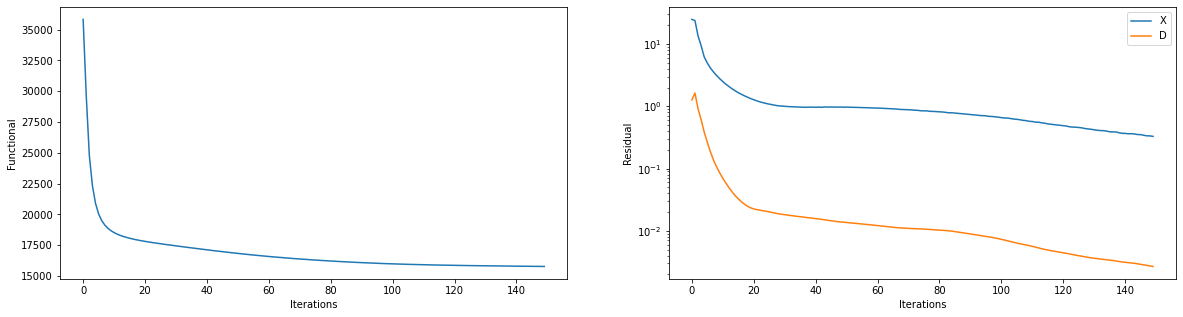

In [8]:
its = d.getitstat()
fig = plot.figure(figsize=(20, 5))
plot.subplot(1, 2, 1)
plot.plot(its.ObjFun, xlbl='Iterations', ylbl='Functional', fig=fig)
plot.subplot(1, 2, 2)
plot.plot(np.vstack((its.XRsdl, its.DRsdl)).T, ptyp='semilogy',
          xlbl='Iterations', ylbl='Residual', lgnd=['X', 'D'],
          fig=fig)
fig.show()